# NATURAL LANGUAGE PROCESSING 

- This is a project that contains the news of the year 2020 with heading , summary , keywords , hashtags , publish_time,	body_polarity , body_polarity_score , title_polarity , title_polarity_score , country_origin ,	state_origin , city_origin.

- The main aim of the project is to analysis the whole dataset and find the most frequent and least frequent words in them 

- We have used Word2vec for converting the words into vectors and joing the columns [heading , summary , hashtags and keywords] to cleaned them and converted them to the list of lists. 

In [1]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)
import nltk
import re
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_json('aylien_cleaned_1_Aug_44.json')  ## uploading the json file
df.head()

,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [3]:
df2 = df.copy()

In [4]:
df = df[:537]

In [5]:
df1 = df.hashtags.copy()

In [6]:
df1.shape

(537,)

In [7]:
df.isnull().sum()    ## checking null values

summary                   0
heading                   0
words_count               0
hashtags                  0
keywords                  0
publish_time              0
body_polarity             1
body_polarity_score       1
title_polarity            0
title_polarity_score      0
country_origin            0
state_origin            380
city_origin             380
dtype: int64

In [8]:
df1[1]

['#India',
 '#Coronavirus',
 '#OneDayInternational',
 '#IndianPremierLeague',
 '#Pandemic',
 '#GovernmentOfIndia',
 '#Lockdown',
 '#LegSpin',
 '#Twitter',
 '#DanceMove',
 '#SocialMedia',
 '#Virus',
 '#Twenty20International',
 '#ODI',
 '#NewZealand',
 '#Whitewash',
 '#ViratKohli',
 '#RoyalChallengersBangalore',
 '#Cricket',
 '#IPL',
 '#BCCI',
 '#BoardOfControlForCricketInIndia']

In [9]:
for i in range(len(df1)):                                 #### Unlisting the listed hashtags
    df1[i] = ','.join(map(str, df1[i]))         

In [10]:
df1.head()

0    #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...
1    #India,#Coronavirus,#OneDayInternational,#Indi...
2    #Lockdown,#ListsOfTransformersCharacters,#Indi...
3    #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...
4    #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...
Name: hashtags, dtype: object

In [11]:
df3 = df1.to_frame()

In [12]:
df3.columns = ['Unlisted_hashtags']

In [13]:
df3.head()

,Unlisted_hashtags
0,"#DGCA,#DirectorateGeneralOfCivilAviation,#Coro..."
1,"#India,#Coronavirus,#OneDayInternational,#Indi..."
2,"#Lockdown,#ListsOfTransformersCharacters,#Indi..."
3,"#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf..."
4,"#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM..."


In [14]:
df4 = pd.concat([df3,df2],axis=1)    #### concatenating the unlisted hashtags

In [15]:
df4.head()

,Unlisted_hashtags,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,"#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,"#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [16]:
df2 = df2.keywords.copy()

In [17]:
df2.head()

0    [flights, passenger, international, passenger ...
1    [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...
2    [Lockdown, COVID-19, Needed, Opinion, Problem,...
3    [Chief, Migrant, Ministers, Labourers, Lockdow...
4    [Auto, Industry, Announcement, Crisis, Situati...
Name: keywords, dtype: object

In [18]:
for i in range(len(df1)):                              ## unlistng the listed Keywords
    df2[i] = ','.join(map(str, df2[i]))

In [19]:
df2.head()

0    flights,passenger,international,passenger flig...
1    Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...
2    Lockdown,COVID-19,Needed,Opinion,Problem,lockd...
3    Chief,Migrant,Ministers,Labourers,Lockdown,Chi...
4    Auto,Industry,Announcement,Crisis,Situation,Ex...
Name: keywords, dtype: object

In [20]:
df3 = df2.to_frame()

In [21]:
df3.head()

,keywords
0,"flights,passenger,international,passenger flig..."
1,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video..."
2,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd..."
3,"Chief,Migrant,Ministers,Labourers,Lockdown,Chi..."
4,"Auto,Industry,Announcement,Crisis,Situation,Ex..."


In [22]:
df3.columns = ['Unlist_keywords']

In [23]:
df4 = pd.concat([df3,df4],axis=1)            ### Concatenating the Unlisted Keywords

In [24]:
df4.head()

,Unlist_keywords,Unlisted_hashtags,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [25]:
df5 = df4[['summary','heading']]

In [26]:
df5 = df5.apply(lambda x: ','.join(x.astype(str)), axis=1)     ###  Store them in a pandas dataframe
df5[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [27]:
sum_head = pd.DataFrame({'sum_head': df5})
sum_head.head()

,sum_head
0,"However, this restriction will not apply to in..."
1,But leg-spinner Yuzvendra Chahal is utilising ...
2,So the math was simple and the step logical: L...
3,"Chief Ministers of three states - Bengal, Biha..."
4,"Finance Minister, Nirmala Sitharaman, today an..."


In [28]:
df4 = pd.concat([sum_head,df4],axis=1)

In [29]:
df4.head()

,sum_head,Unlist_keywords,Unlisted_hashtags,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...","flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...","Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [30]:
df4.drop(['keywords','hashtags','summary','heading'],axis=1,inplace=True)    ### Dropping the unwanted columns 

In [31]:
df4.head()

,sum_head,Unlist_keywords,Unlisted_hashtags,words_count,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...","flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...",223,2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",292,2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",812,2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...",401,2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...","Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...",604,2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [32]:
df_new = df4[['sum_head','Unlisted_hashtags','Unlist_keywords']]

In [33]:
df_new = df_new.apply(lambda x: ','.join(x.astype(str)), axis=1)      ### Store them in a pandas dataframe
df_new[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [34]:
df_new = df_new.to_frame()
df_new.columns = ['allwords']
df_new.head()

,allwords
0,"However, this restriction will not apply to in..."
1,But leg-spinner Yuzvendra Chahal is utilising ...
2,So the math was simple and the step logical: L...
3,"Chief Ministers of three states - Bengal, Biha..."
4,"Finance Minister, Nirmala Sitharaman, today an..."


## Cleaning the dataset by :

- removing the unwanted words by using stopwords and custom words
- using lemmetization
- lowering them
- only keeping the alphabets 

In [35]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['per','due','daily','one','also','day','time','new','r' ,'home','year','month','social']
stopwords.extend(newStopWords)
stop_words = set(stopwords)



import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
corpus = []

newStopWords = ['per','due','daily','one','also','day','time','new','r' ,'home','year','month','social','nan']

for i in range(0, len(df_new)):
    review = re.sub('[^a-zA-Z]', ' ', df_new['allwords'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
corpus[0]

'however restriction apply international cargo operation flight specifically approved dgca international commercial passenger flight remain suspended till april aviation regulator dgca announced thursday amid nationwide lockdown prevent spread novel coronavirus directorate general civil aviation dgca march announced international commercial passenger flight operation take place india march march continuation circular ii dated issued subject cited decided scheduled international commercial passenger service shall remain closed till hr gmt hr indian standard april aviation regulator said however restriction apply international cargo operation flight specifically approved dgca said ban international passenger flight extended till apr dgca directorategeneralofcivilaviation coronavirus lockdown india gmt greenwichmeantime ministryofhealthandfamilywelfare primeministeroftheunitedkingdom narendramodi reuters flight passenger international passenger flight passenger flight coronavirus country 

In [37]:
df_clean = pd.DataFrame(corpus,columns = ['text'])    #### Froming  the dataset

In [38]:
df_clean.head()

,text
0,however restriction apply international cargo ...
1,leg spinner yuzvendra chahal utilising self qu...
2,math simple step logical lockdown three week i...
3,chief minister three state bengal bihar odisha...
4,finance minister nirmala sitharaman today anno...


In [39]:
sent = [row.split(' ') for row in df_clean['text']]

### Using gensim library to form vectors

In [40]:
from gensim.models import Word2Vec                        
model = Word2Vec(sent, min_count=300,size= 100,workers=3, window =20, sg = 1)

In [41]:
model.most_similar('coronavirus')[:5]

[('pandemic', 0.9334927797317505),
 ('thursday', 0.8930096626281738),
 ('india', 0.8915297985076904),
 ('outbreak', 0.8900421857833862),
 ('march', 0.8832701444625854)]

In [42]:
model.wv.index2entity[:20]  ## top 20 most frequent words

['coronavirus',
 'lockdown',
 'covid',
 'india',
 'said',
 'pandemic',
 'minister',
 'people',
 'government',
 'health',
 'virus',
 'case',
 'hospital',
 'police',
 'state',
 'country',
 'indian',
 'lakh',
 'delhi',
 'worker']

In [43]:
model['coronavirus']

array([ 0.03045725,  0.07387457,  0.07070177,  0.04173965, -0.00912009,
        0.16703373, -0.09840372, -0.04865484, -0.08916379, -0.07411366,
        0.07515476, -0.07722516, -0.00739616,  0.16158952,  0.07862559,
       -0.14628807,  0.0942278 , -0.07017688,  0.03340527,  0.09235104,
        0.13500474, -0.008874  ,  0.04770994,  0.06645291, -0.13768673,
       -0.04627961,  0.30793852, -0.17157188,  0.10516788, -0.17363447,
       -0.20402794, -0.10025732,  0.15467906, -0.07638655,  0.11116684,
        0.05240809,  0.03261194, -0.00946939, -0.13593136, -0.08601759,
       -0.12990674, -0.044187  ,  0.0078424 ,  0.18240154, -0.02167598,
       -0.14950494, -0.06359649, -0.00848999, -0.07790652, -0.00139076,
        0.1402243 , -0.06162556, -0.02931655, -0.24436934,  0.04138689,
        0.00899541, -0.0937633 ,  0.15458941, -0.04454676,  0.01919465,
       -0.12673147, -0.02480711,  0.04869464,  0.14149918,  0.07112852,
       -0.19901331, -0.09244252, -0.053124  , -0.14751248,  0.01

In [44]:
words=list(model.wv.vocab)                  ### Words learned by our model
print(words)

['thursday', 'lockdown', 'coronavirus', 'march', 'india', 'service', 'indian', 'said', 'country', 'health', 'prime', 'minister', 'quarantine', 'video', 'pandemic', 'twitter', 'virus', 'government', 'people', 'worker', 'covid', 'hospital', 'infection', 'case', 'chief', 'state', 'medical', 'crore', 'lakh', 'outbreak', 'police', 'district', 'essential', 'official', 'instagram', 'delhi', 'world', 'positive', 'wednesday', 'r', 'nan']


In [45]:
X=model[model.wv.vocab]               ### froming the dataset of the vectors by comparing them
df=pd.DataFrame(X)  
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.078384,-0.003289,0.049009,0.129735,0.066936,0.138244,-0.129494,-0.089708,-0.079084,-0.123571,...,0.205162,-0.155166,0.055939,0.059792,0.017455,-0.022143,0.108995,-0.063151,-0.028862,-0.019142
1,0.047578,0.178929,-0.035319,0.194848,0.086997,0.134947,-0.123128,-0.057958,-0.120324,-0.091354,...,0.071108,0.030480,0.018212,0.100898,0.053899,0.017851,-0.034698,-0.107675,0.094733,-0.088995
2,0.030457,0.073875,0.070702,0.041740,-0.009120,0.167034,-0.098404,-0.048655,-0.089164,-0.074114,...,0.189663,-0.195963,0.038472,0.138801,-0.020152,-0.054516,0.036352,-0.014854,-0.066240,-0.067468
3,0.159919,0.078739,0.118199,0.119453,0.036903,0.141503,-0.234723,-0.028750,-0.089006,-0.013726,...,0.055288,-0.184926,0.047610,0.018991,-0.091952,-0.055441,0.111371,0.061546,-0.113178,-0.074496
4,0.009375,0.093724,0.069075,0.001912,0.078569,0.198488,-0.030970,0.003581,-0.052383,-0.010393,...,0.241556,-0.122292,0.047219,0.289220,0.097169,0.049065,0.002614,0.046896,-0.081539,-0.062960


### In order to visualize the relation we need the convert the vectors into 2 Dimensional form ,this can be achieved by using PCA(Principal Component Analysis) 

In [46]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [47]:
len(model.wv.index2entity[:])     ### Total words learned

41

## Graphical representation

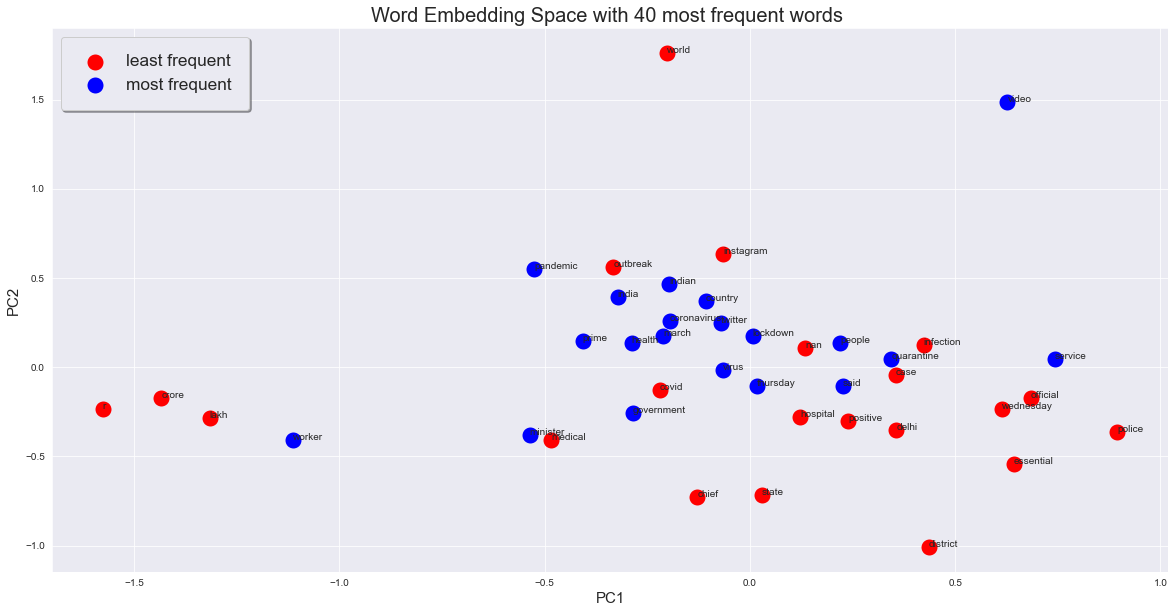

In [48]:
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(neww_X[20:,0],neww_X[20:,1],linewidths=10,color='red',label='least frequent')
plt.scatter(neww_X[:20,0],neww_X[:20,1],linewidths=10,color='blue',label = 'most frequent')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='xx-large')
plt.title("Word Embedding Space with 40 most frequent words ",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
# plt.savefig('most_least_words_new_stopwords_top_20.png', dpi=400, bbox_inches='tight')


### Words with least frequency

In [49]:
for word in model.wv.vocab:
    if(model.wv.vocab[word].count <180):
        print((word, model.wv.vocab[word].count))

In [50]:
vocab1 = model.wv.index2entity[-20:]  #### Least 20 words
vocab1

['positive',
 'infection',
 'district',
 'chief',
 'crore',
 'twitter',
 'wednesday',
 'march',
 'quarantine',
 'outbreak',
 'essential',
 'service',
 'official',
 'thursday',
 'instagram',
 'r',
 'medical',
 'video',
 'prime',
 'world']